In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from thinkdsp import read_wave
from thinkdsp import decorate
from thinkdsp import Spectrum
from thinkdsp import Wave
from thinkdsp import Noise

Упражнение 4.1

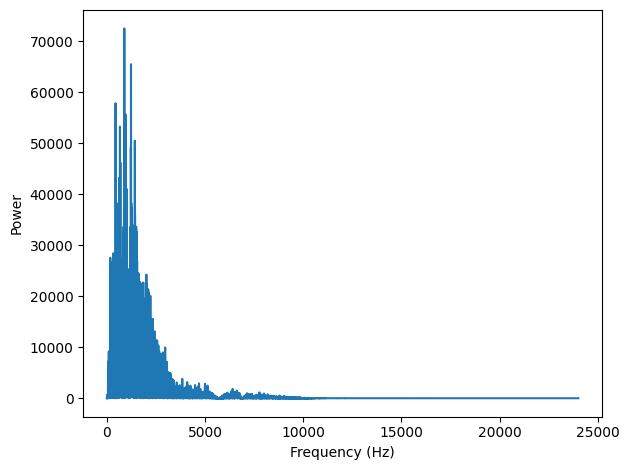

In [177]:
waveNoise = read_wave('132736__ciccarelli__ocean-waves.wav')
segmentNoise1 = waveNoise.segment(start = 5, duration = 1)
spectrumNoise1 = segmentNoise1.make_spectrum()
spectrumNoise1.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power')
segmentNoise1.make_audio()

По спектру видно, что это не белый шум, так как он имеет одинаковую среднюю мощность на всех частотах.

Анализ зависимости спада мощности от частоты поможет определить, является ли данный шум красным или розовым.

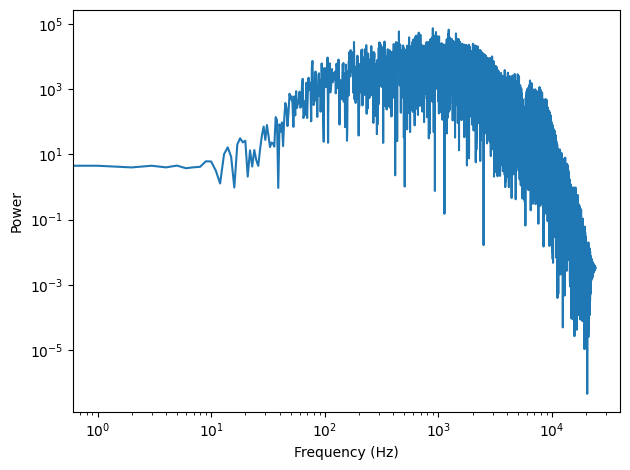

In [178]:
spectrumNoise1.plot_power()
loglog = dict(xscale = 'log', yscale = 'log')
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)

In [179]:
spectrumNoise1.estimate_slope()[0]

-4.054075477835914

Данная зависимость не похожа ни на красный, ни на розовый шум, так как мы видим не характерное для них возрастание мощности, а затем резкий спад. Наклон для красного шума должен быть равен -2, а для розового лежать в диапазоне от 0 до -2.

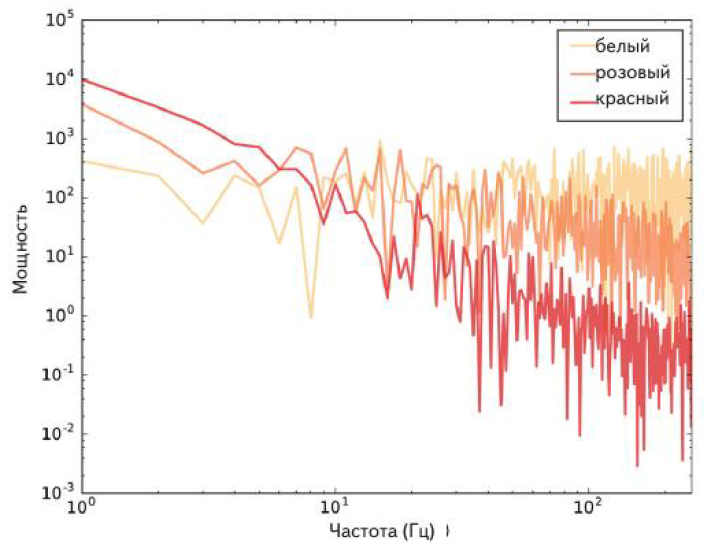

Проделаем данные операции с другим фрагментом шума:

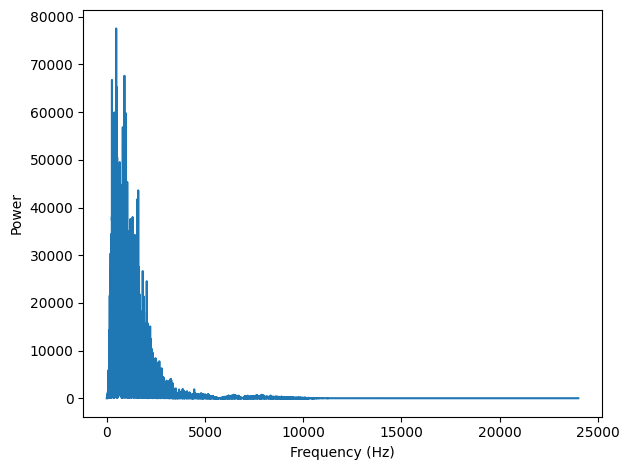

In [180]:
segmentNoise2 = waveNoise.segment(start = 20, duration = 1)
spectrumNoise2 = segmentNoise2.make_spectrum()
spectrumNoise2.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power')
segmentNoise2.make_audio()

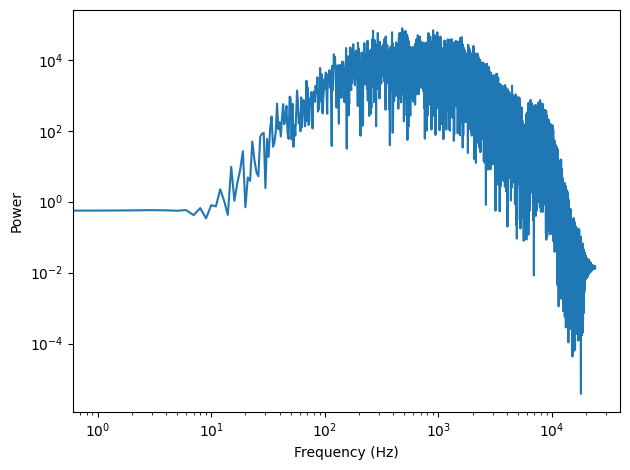

In [181]:
spectrumNoise2.plot_power()
loglog = dict(xscale = 'log', yscale = 'log')
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)

In [182]:
spectrumNoise2.estimate_slope()[0]

-3.8202673661576663

Мы можем наблюдать аналогичную ситуацию.

Упражнение 4.2

In [183]:
def bartlett_method(wave, seg_length = 512, win_flag = True):
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    psds = [spectrum.power for spectrum in spectrums]
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

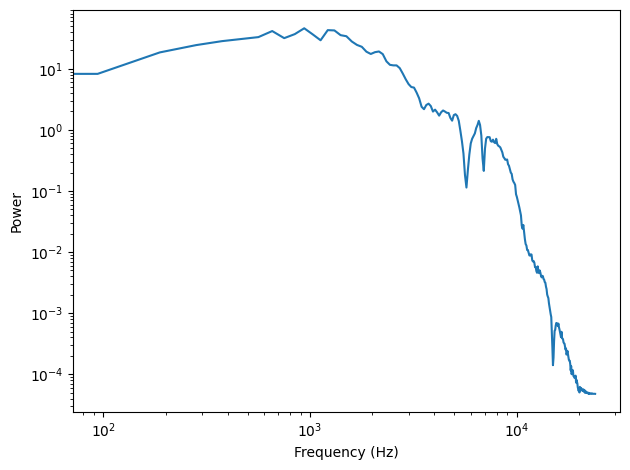

In [184]:
sgNoise1 = bartlett_method(segmentNoise1)
sgNoise1.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)

Благодаря написанной функции мы можем видеть наглядную зависимость мощности шума от его частоты.

Упражнение 4.3

In [185]:
data = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', parse_dates = [0])
data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


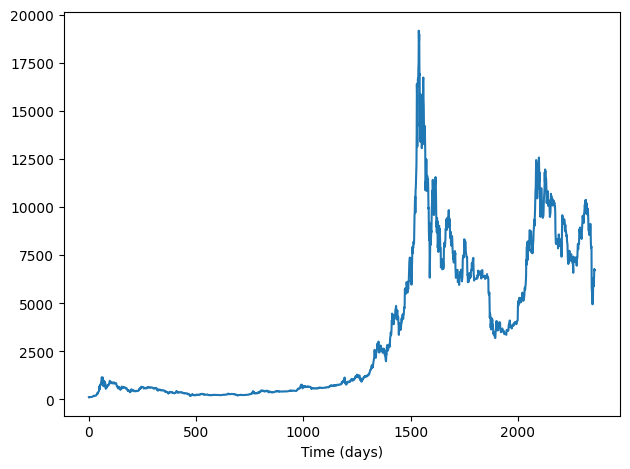

In [186]:
waveBitCoin = Wave(data['Closing Price (USD)'], data.index, framerate = 1)
waveBitCoin .plot()
decorate(xlabel = 'Time (days)')

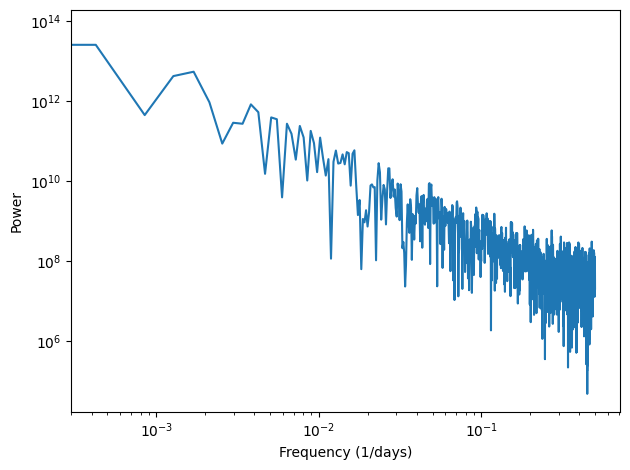

In [187]:
spectrumBitCoin = waveBitCoin.make_spectrum()
spectrumBitCoin.plot_power()
decorate(xlabel = 'Frequency (1/days)', ylabel = 'Power', **loglog)

In [188]:
spectrumBitCoin.estimate_slope()[0]

-1.7332540936758956

Так как наклон спектра цен биткойна равен -1.7 его можно назвать розовым шумом, наклон которого должен лежать в диапазоне от 0 до -2.

Упражнение 4.4

In [189]:
class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

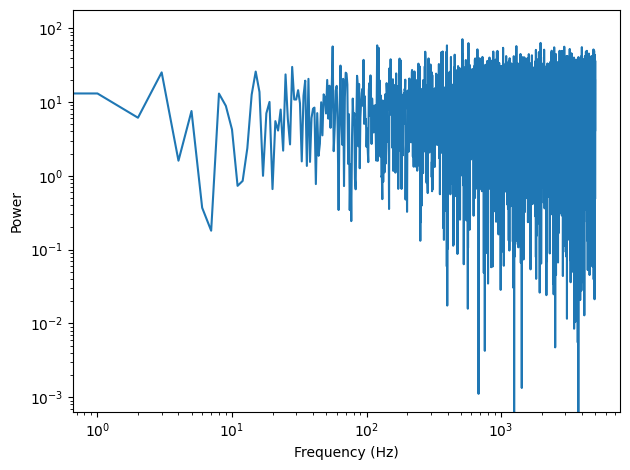

In [190]:
signalGeiger = UncorrelatedPoissonNoise(amp = 0.001)
waveGeiger = signalGeiger.make_wave(duration = 1, framerate = 10000)
spectrumGeiger = waveGeiger.make_spectrum()
spectrumGeiger.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)
waveGeiger.make_audio()

В случае большого значения amp:

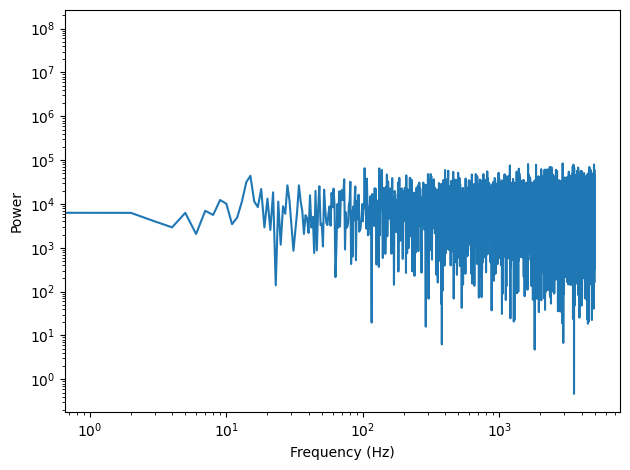

In [191]:
signalGeigerBig = UncorrelatedPoissonNoise(amp = 1)
waveGeigerBig = signalGeigerBig.make_wave(duration = 1, framerate = 10000)
spectrumGeigerBig = waveGeigerBig.make_spectrum()
spectrumGeigerBig.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)
waveGeigerBig.make_audio()

Действительно, в случае большого amp, мы слышим, как звук щетчика Гейгера превратился в белый шум. Об этом свидетельствует его спектр мощности: средняя мощность на всех частотах одинкова.

Упражнение 4.5

In [ ]:
def Voss_McCartney(nrows, ncols = 16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size = n)
    array[rows, cols] = np.random.random(n)
    df = pd.DataFrame(array)
    df.fillna(method = 'ffill', axis = 0, inplace = True)
    total = df.sum(axis = 1)
    return total.values

C:\Users\artem\AppData\Local\Temp\ipykernel_15424\1423744781.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method = 'ffill', axis=0, inplace=True)


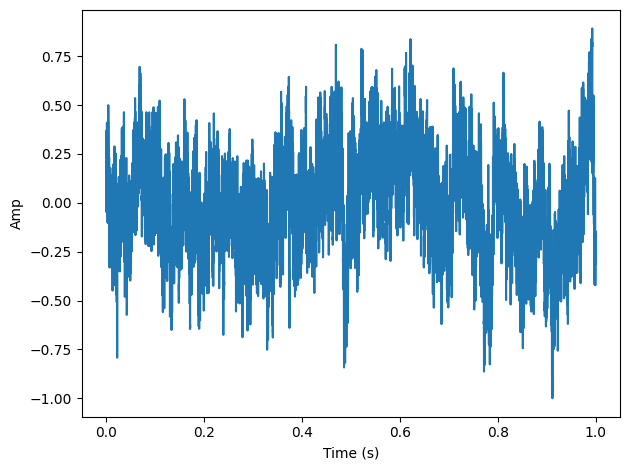

In [208]:
waveMyPink = Wave(Voss_McCartney(11025))
waveMyPink.unbias()
waveMyPink.normalize()
waveMyPink.plot()
decorate(xlabel = 'Time (s)', ylabel = 'Amp')
waveMyPink.make_audio()

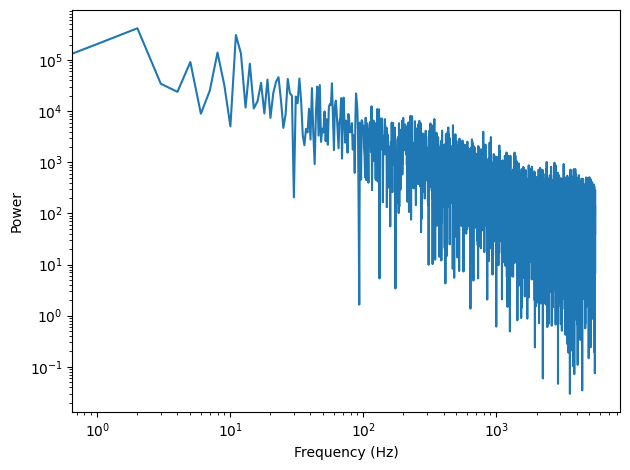

In [209]:
spectrumMyPink = waveMyPink.make_spectrum()
spectrumMyPink.hs[0] = 0
spectrumMyPink.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)

In [211]:
spectrumMyPink.estimate_slope()[0]

-1.028597619276373

Так как наклон зависимости в спектре мощности составляет -1.029, то данный шум можно назвать розовым (наклон лежит в диапазоне от 0 до -2)